In [1]:
# Import library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Memuat dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/hansk88/Proyek-1-Predictive-Analysis/refs/heads/main/openweatherdata-denpasar-1990-2020.csv')

# Mencetak lima baris pertama dari dataset
dataset.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,631152000,1990-01-01 00:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,...,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,631155600,1990-01-01 01:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,...,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,631159200,1990-01-01 02:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,631162800,1990-01-01 03:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,631166400,1990-01-01 04:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d


In [3]:
# Memeriksa info pada dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264924 entries, 0 to 264923
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   264924 non-null  int64  
 1   dt_iso               264924 non-null  object 
 2   timezone             264924 non-null  int64  
 3   city_name            264924 non-null  object 
 4   lat                  264924 non-null  float64
 5   lon                  264924 non-null  float64
 6   temp                 264924 non-null  float64
 7   temp_min             264924 non-null  float64
 8   temp_max             264924 non-null  float64
 9   pressure             264924 non-null  float64
 10  sea_level            0 non-null       float64
 11  grnd_level           0 non-null       float64
 12  humidity             264924 non-null  int64  
 13  wind_speed           264924 non-null  float64
 14  wind_deg             264924 non-null  int64  
 15  rain_1h          

Terdapat 32 kolom dengan rincian sebagai berikut:
* 21 kolom bertipe float
* 6 kolom bertipe integer
* 5 kolom bertipe object

Selain itu diketahui juga bahwa jumlah data yaitu sebanyak 264,924 sampel data

Perlu diperhatikan bahwa dalam proyek kali ini, ada dua kolom yang dapat menjadi label dataset yaitu kolom **weather_main** dan **weather_description**. Karena kolom **weather_description** lebih lengkap, maka kolom ini akan dijadikan sebagai label dataset. Selanjutnya, dataset yang sudah ada akan dibersihkan terlebih dahulu

In [4]:
# Menghapus kolom yang tidak relevan
dataset.drop(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'weather_id', 'weather_main', 'weather_icon'], inplace=True, axis=1)

Dari info sebelumnya, didapati bahwa kolom **sea_level**, **grnd_level**, **rain_today**, **snow_1h**, **snow_3h**, **snow_6h**, **snow_12h**, **snow_24h**, **snow_today** tidak memiliki nilai sama sekali sehingga akan dihapus terlebih dahulu

In [5]:
# Menghapus kolom yang nilainya null semua
dataset.drop(['sea_level', 'grnd_level', 'rain_today', 'snow_1h', 'snow_3h', 'snow_6h', 'snow_12h', 'snow_24h', 'snow_today'], inplace=True, axis=1)

Dapat kita lihat juga bahwa antara kolom **temp** dengan kolom **temp_min** dan kolom **temp_max** cenderung memiliki nilai yang sama. Untuk selanjutnya, akan dicek apakah hal tersebut memang benar. Jika benar, maka kolom **temp_min** dan **temp_max** akan dihapus

In [6]:
# Menghitung baris dimana kolom temp, temp_min, dan temp_max memiliki setidaknya satu nilai yang berbeda
check_diff = ((dataset["temp"] != dataset["temp_min"]) &
              (dataset["temp"] != dataset["temp_max"])).sum()


print(f"Jumlah baris dimana nilai antara ketiga kolom memiliki setidaknya satu perbedaan: {check_diff}")

Jumlah baris dimana nilai antara ketiga kolom memiliki setidaknya satu perbedaan: 103183


Setelah di-run, diketahui bahwa nilai antar kolom tersebut ternyata ada yang berbeda sehingga kolom **temp_min** dan **temp_max** tidak jadi dihapus

In [7]:
# Memeriksa kolom yang memiliki nilai null
dataset.isna().sum()

,0
temp,0
temp_min,0
temp_max,0
pressure,0
humidity,0
wind_speed,0
wind_deg,0
rain_1h,248638
rain_3h,248768
rain_6h,228826


Dapat dilihat bahwa sekitar 86.29% (atau lebih) data dari kolom **rain_1h**, **rain_3h**, **rain_6h**, **rain_12h**, **rain_24h** adalah null dan hasilnya akan bias semisal nilai yang null tersebut diisi dengan nilai mean, modus, ataupun nilai lainnya sehingga kolom-kolom tersebut akan dihapus juga

In [8]:
# Menghapus kolom yang nilainya mayoritas null semua
dataset.drop(['rain_1h', 'rain_3h', 'rain_6h', 'rain_12h', 'rain_24h'], inplace=True, axis=1)

In [9]:
# Memeriksa ulang info pada dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264924 entries, 0 to 264923
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temp                 264924 non-null  float64
 1   temp_min             264924 non-null  float64
 2   temp_max             264924 non-null  float64
 3   pressure             264924 non-null  float64
 4   humidity             264924 non-null  int64  
 5   wind_speed           264924 non-null  float64
 6   wind_deg             264924 non-null  int64  
 7   clouds_all           264924 non-null  int64  
 8   weather_description  264924 non-null  object 
dtypes: float64(5), int64(3), object(1)
memory usage: 18.2+ MB


In [10]:
# Memeriksa duplikasi pada dataset
data_duplikat = dataset.duplicated().sum()
print("Jumlah data duplikat: ", data_duplikat)

Jumlah data duplikat:  31967


In [11]:
# Menghapus data duplikat
dataset.drop_duplicates(inplace=True)
dataset.shape

(232957, 9)

In [12]:
# Memeriksa statistik deskriptif pada dataset
dataset.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all
count,232957.000000,232957.000000,232957.000000,232957.000000,232957.000000,232957.000000,232957.000000,232957.000000
mean,27.194763,27.053532,27.334555,1010.021818,81.196109,3.634333,159.075233,39.975712
std,1.946624,1.952425,1.981986,2.307793,8.668052,1.958058,85.919162,25.740961
min,3.000000,2.000000,3.000000,998.400000,14.000000,0.010000,0.000000,0.000000
25%,25.890000,25.800000,26.000000,1008.300000,74.000000,2.100000,105.000000,20.000000
50%,27.000000,27.000000,27.000000,1010.200000,83.000000,3.600000,120.000000,39.000000
75%,28.400000,28.000000,28.800000,1011.900000,88.000000,5.000000,250.000000,40.000000
max,39.000000,39.000000,39.800000,1023.200000,100.000000,31.900000,360.000000,100.000000


Diperoleh nilai mean, median, Q1, Q2, Q3, min, serta max untuk setiap kolom bertipe float maupun integer

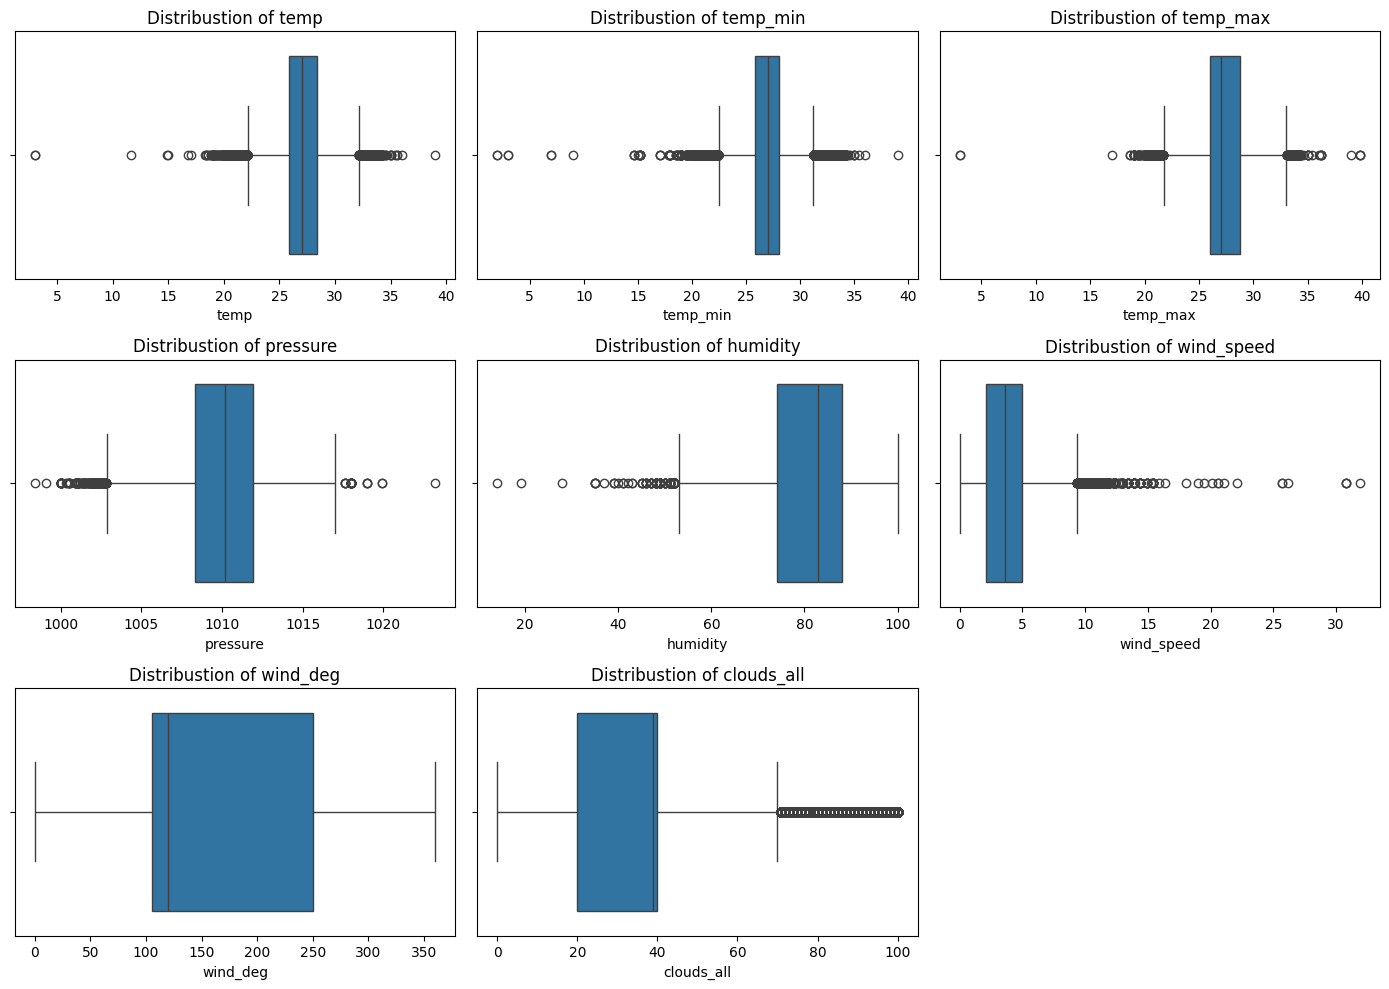

In [13]:
# Mendeteksi outlier
num_features = ['temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all']
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=dataset[column])
    plt.title(f'Distribustion of {column}')
plt.tight_layout()
plt.show()

In [14]:
# Menentukan Q1, Q3, dan IQR untuk masing-masing kolom
Q1 = dataset[num_features].quantile(0.25)
Q3 = dataset[num_features].quantile(0.75)
IQR = Q3 - Q1

# Menghapus baris yang mengandung outlier
filter_outliers = ~((dataset[num_features] < (Q1 - 1.5 * IQR)) |
                    (dataset[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)
dataset = dataset[filter_outliers]

# Cek ukuran dataset setelah outlier dihapus
dataset.shape

(177803, 9)

Setelah outlier pada masing-masing kolom dihapus didapati sampel data berkurang sebanyak 55,154 atau 23.67%

In [15]:
# Menghitung jumlah sampel data pada masing-masing label
dataset['weather_description'].value_counts()

,count
weather_description,
few clouds,96311
scattered clouds,56132
light rain,10743
broken clouds,3968
sky is clear,3839
moderate rain,2373
thunderstorm,1443
proximity thunderstorm,824
heavy intensity rain,821


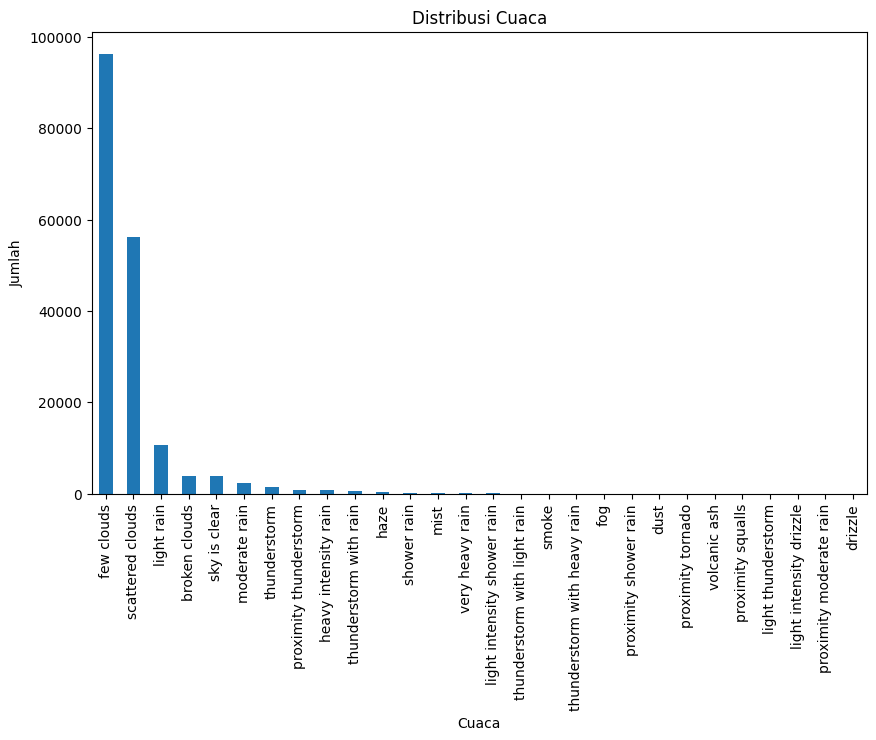

In [29]:
# Membuat diagram batang untuk menunjukkan distribusi entri pada kolom label
counts = dataset['weather_description'].value_counts()
counts.plot(kind='bar', figsize=(10,6))
plt.title('Distribusi Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah')
plt.show()

Selanjutnya kita akan melihat korelasi setiap fitur dengan label. Karena label masih berbentuk object maka dilakukan encoding untuk merubahnya menjadi angka (numerik)

In [16]:
# Encoding kolom label
label_encoders = {}

categorical_columns = dataset.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

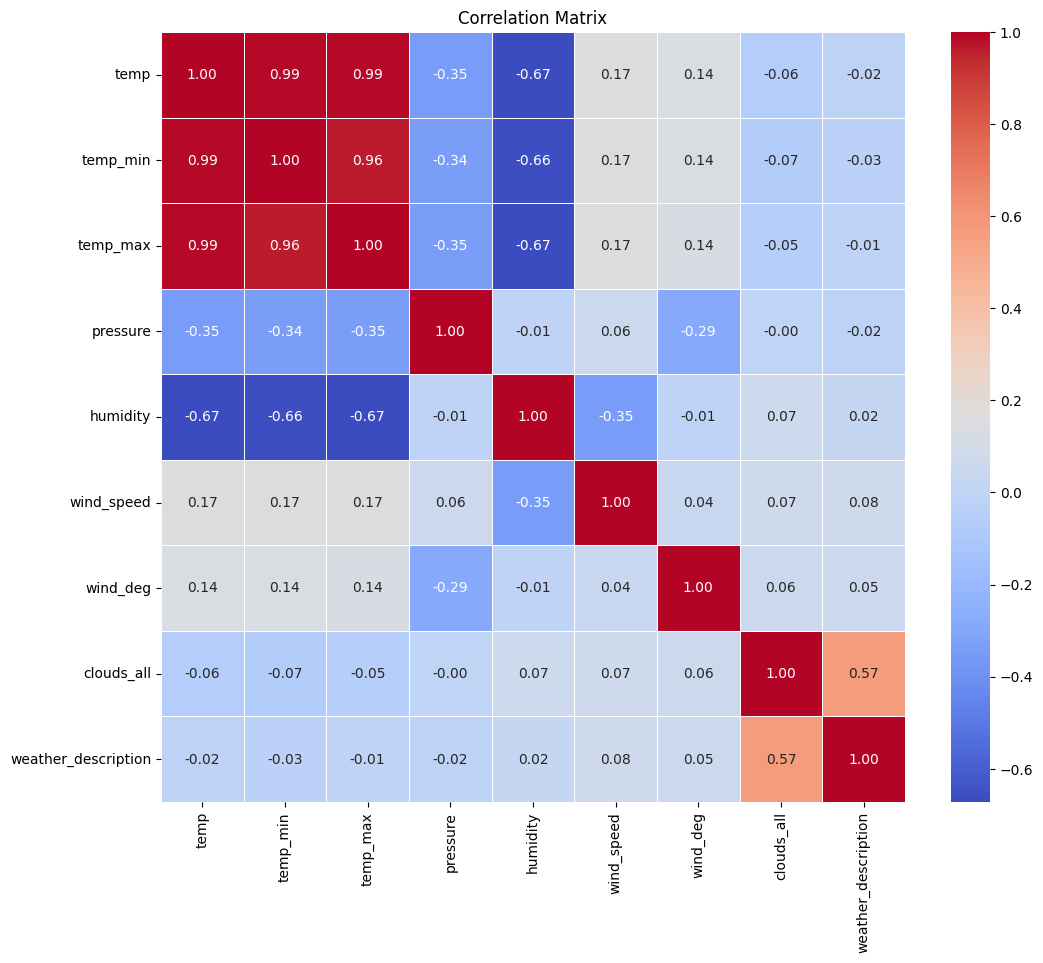

In [17]:
# Menampilkan matriks korelasi untuk melihat korelasi antar kolom fitur dengan kolom label
num_features = dataset.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Didapati bahwa korelasi antar kolom fitur dengan kolom label cenderung lemah, dengan pengecualian untuk kolom **clouds_all**

In [18]:
# Melakukan inverse untuk kolom weather_description yang sebelumnya di-encode
for column, encoder in label_encoders.items():
    dataset[column] = encoder.inverse_transform(dataset[column])

In [19]:
# Splitting data menjadi data latih dan data uji
X = dataset.drop(["weather_description"],axis =1)
y = dataset["weather_description"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'Total data latih: {len(X_train)}')
print(f'Total data uji: {len(X_test)}')

Total data latih: 142242
Total data uji: 35561


In [25]:
# Pelatihan Model
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
boosting = AdaBoostClassifier().fit(X_train, y_train)

In [21]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai sebuah dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'AdaBoost (Boosting)': evaluate_model(boosting, X_test, y_test)
}

# Membuat dataframe untuk hasil evaluasi
summary = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'F1-Score': metrics['F1-Score'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall']
    })

summary = pd.DataFrame(rows)

# Menampilkan hasil evaluasi
summary

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,F1-Score,Precision,Recall
0,K-Nearest Neighbors (KNN),0.891004,0.869208,0.853304,0.891004
1,Random Forest (RF),0.906189,0.884040,0.875072,0.906189
2,AdaBoost (Boosting),0.856247,0.811379,0.773095,0.856247


# Inferensi model

In [31]:
# Memasukkan input
temp = float(input("temp = "))
temp_min = float(input("temp_min = "))
temp_max = float(input("temp_max = "))
pressure = float(input("pressure = "))
humidity = float(input("humidity = "))
wind_speed = float(input("wind_speed = "))
wind_deg = float(input("wind_deg = "))
clouds_all = float(input("clouds_all = "))

# Membuat semua input menjadi sebuah dataframe
input_data = pd.DataFrame([{
    "temp": temp,
    "temp_min": temp_min,
    "temp_max": temp_max,
    "pressure": pressure,
    "humidity": humidity,
    "wind_speed": wind_speed,
    "wind_deg": wind_deg,
    "clouds_all": clouds_all
}])

# Memprediksi cuaca
predicted_label = boosting.predict(input_data)[0]
print("Predicted weather: ", predicted_label)

temp = 25.4
temp_min = 25.3
temp_max = 25.5
pressure = 1008.5
humidity = 98.1
wind_speed = 1.51
wind_deg = 360
clouds_all = 40
Predicted weather:  scattered clouds
